# Model Evaluation - English 1

## 0. Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_analyzing.data_analyzer import DataAnalyzer
from evaluation.model_evaluator import ModelEvaluator
from training.model import Model

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yaroslav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yaroslav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yaroslav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Loading dataset

In [2]:
COVID_PREPROCESSED_DATA_PATH = "D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\data\preprocessed/espanol"

In [3]:
data_json = pd.read_json(COVID_PREPROCESSED_DATA_PATH, orient="records", lines=True)

In [4]:
# dataset_1 = data_json.loc[data_json['label'] == 1].head(20)
# dataset_0 = data_json.loc[data_json['label'] == 0].head(20)

dataset_1 = data_json.loc[data_json['label'] == 1]
dataset_0 = data_json.loc[data_json['label'] == 0]

dataset = pd.concat([dataset_1, dataset_0])
dataset = dataset.sample(frac=1, random_state=10)

In [5]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=42)

## 2. Loading model

In [6]:
COVID_MODEL_V1_PATH = "D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\model\spanish\spanish_bert.h5py"

In [7]:
model_covid_v1 = Model.load_saved_model(COVID_MODEL_V1_PATH, useGPU=False)

All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at D:\SEM6/NLP/NLP_last_3/NLP-Fake-News-Detection\model\spanish\spanish_bert.h5py.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


#### 2.1 Train data

Accuracy:   0.97049
Precision:  0.98519
Recall:     0.95227
F1 score:   0.96845




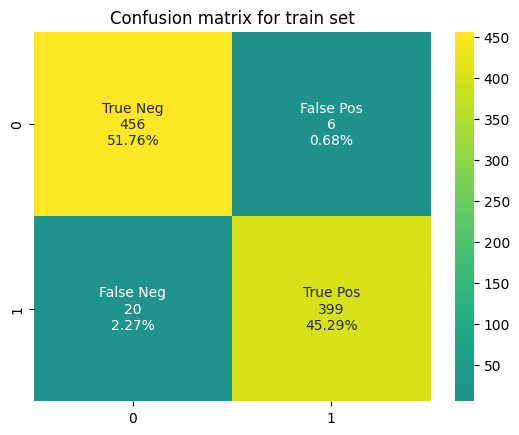

([0.97049, 0.98519, 0.95227, 0.96845],
 [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
 

In [8]:
ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=train_data,
    set_type="train"
)

#### 2.2 Test data

Accuracy:   0.97285
Precision:  0.98889
Recall:     0.94681
F1 score:   0.96739




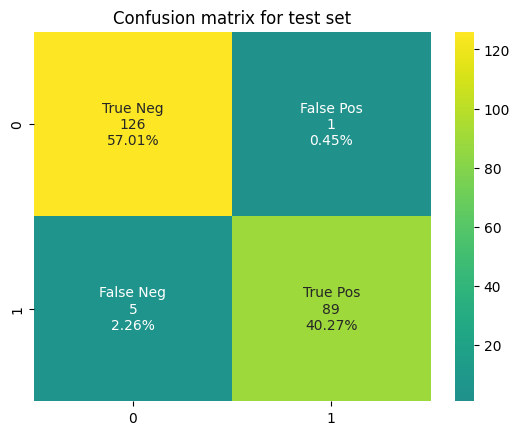

In [9]:
scores, y_true, y_pred = ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=test_data,
    set_type="test"
)

In [10]:
test_data_correctly_predicted_model_v1 = ModelEvaluator.get_correctly_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

In [11]:
test_data_false_predicted_model_v1 = ModelEvaluator.get_false_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

## 3. Results Analyzing

#### 3.1 Polarity

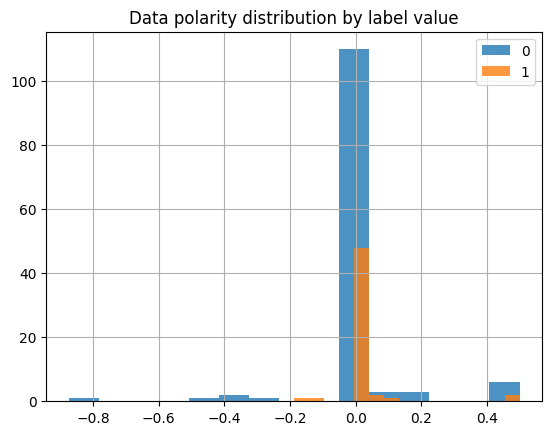

In [12]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_correctly_predicted_model_v1)

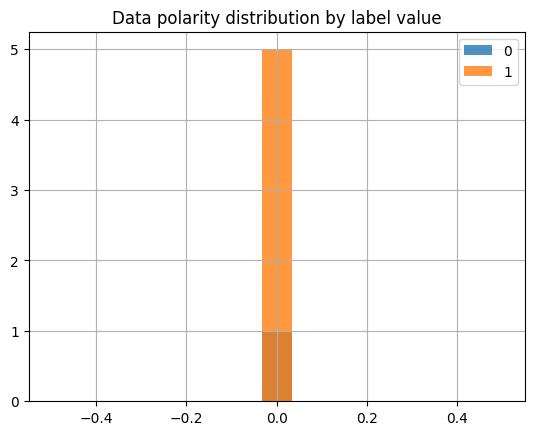

In [13]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.2 Subjectivity

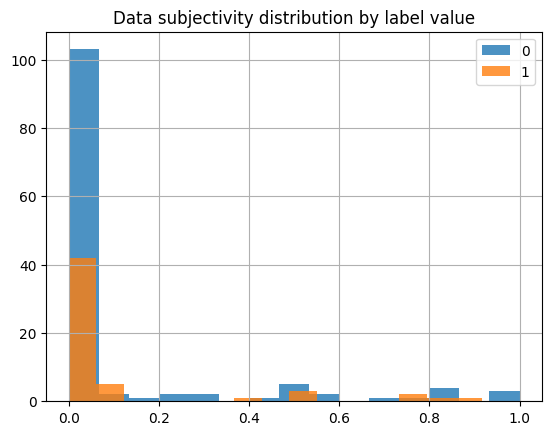

In [14]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_correctly_predicted_model_v1)

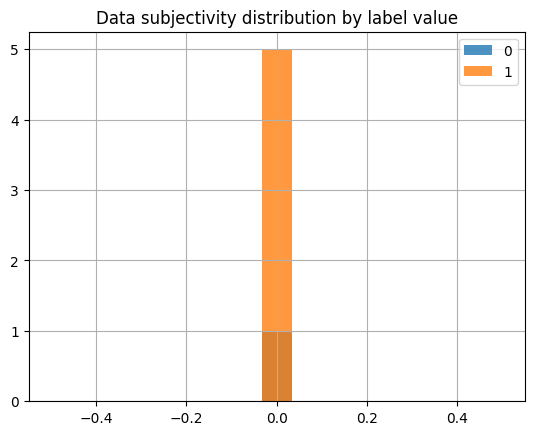

In [15]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.3 Most Popular Words map

In [16]:
most_popular_words_correct = DataAnalyzer.get_most_popular_words(
    dataset=test_data_correctly_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

In [17]:
most_popular_words_false = DataAnalyzer.get_most_popular_words(
    dataset=test_data_false_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

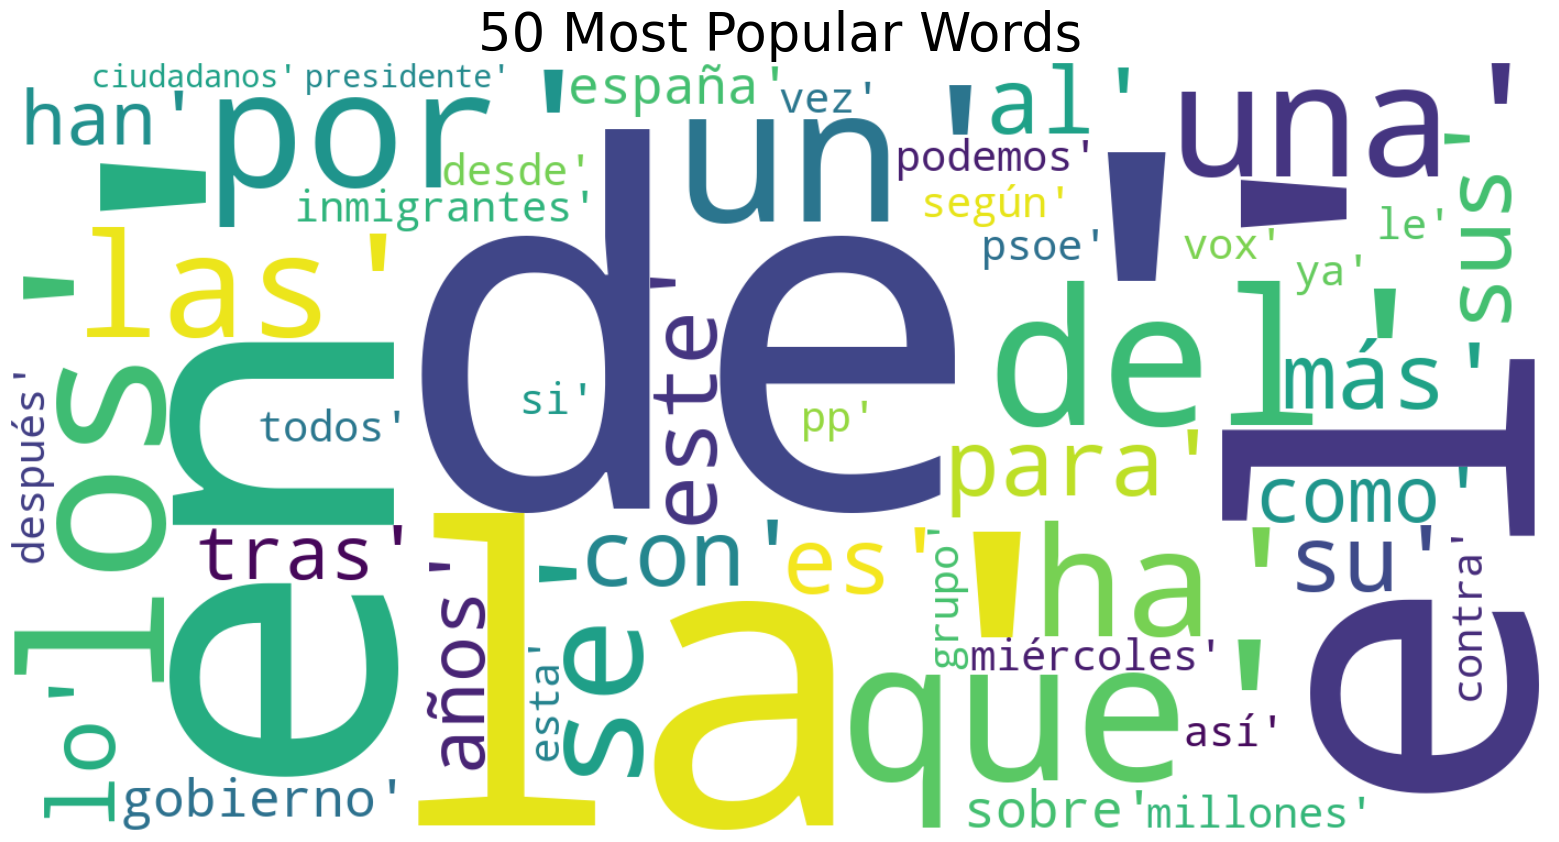

In [18]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=50,
    label_type=None
)

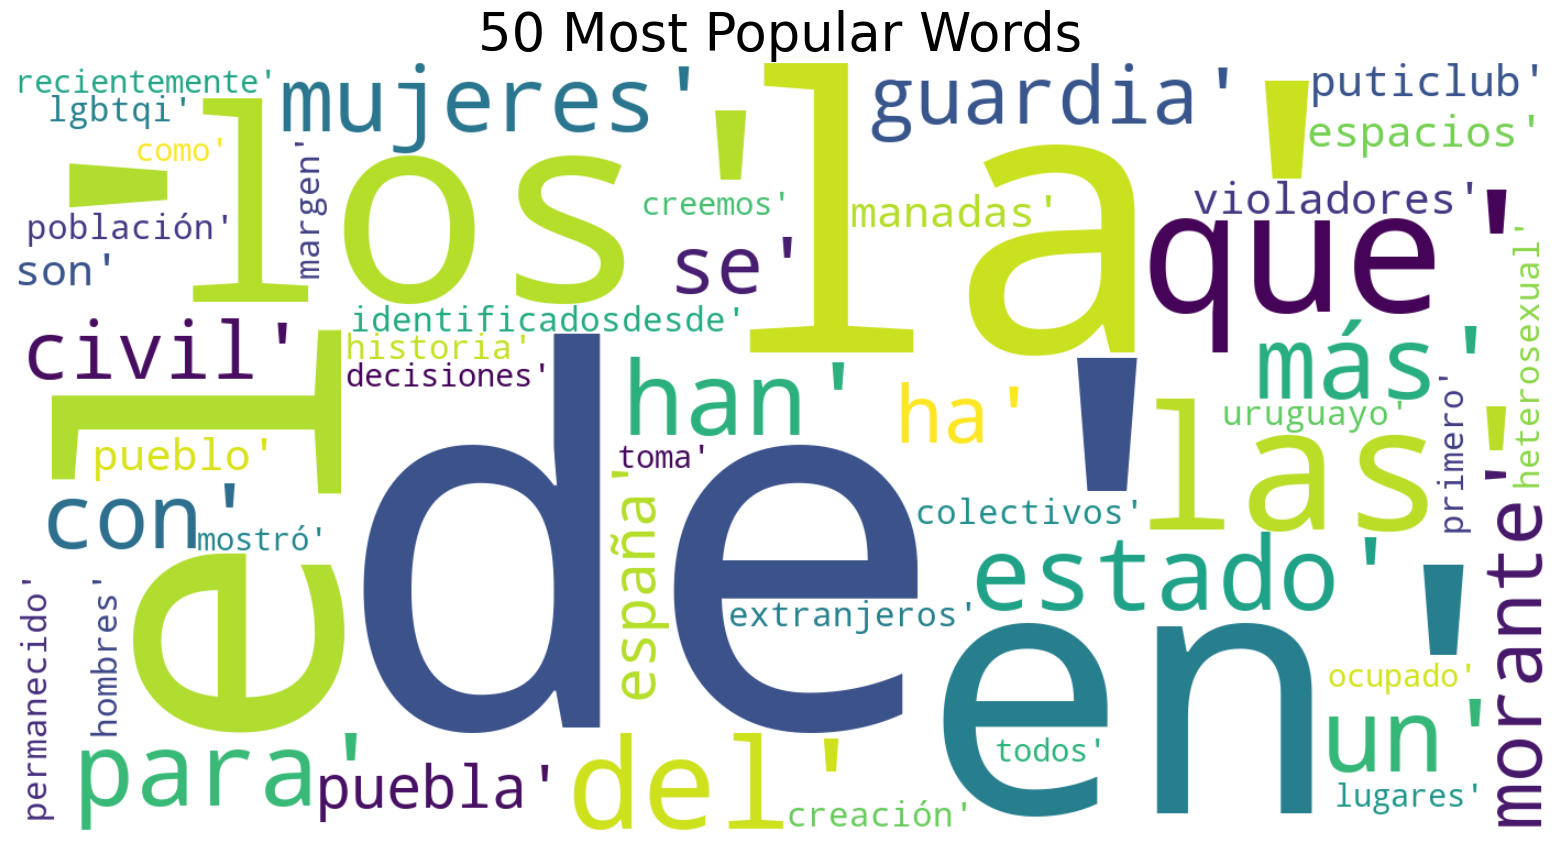

In [19]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=50,
    label_type=None
)

#### 3.4 Most Popular Words Histogram

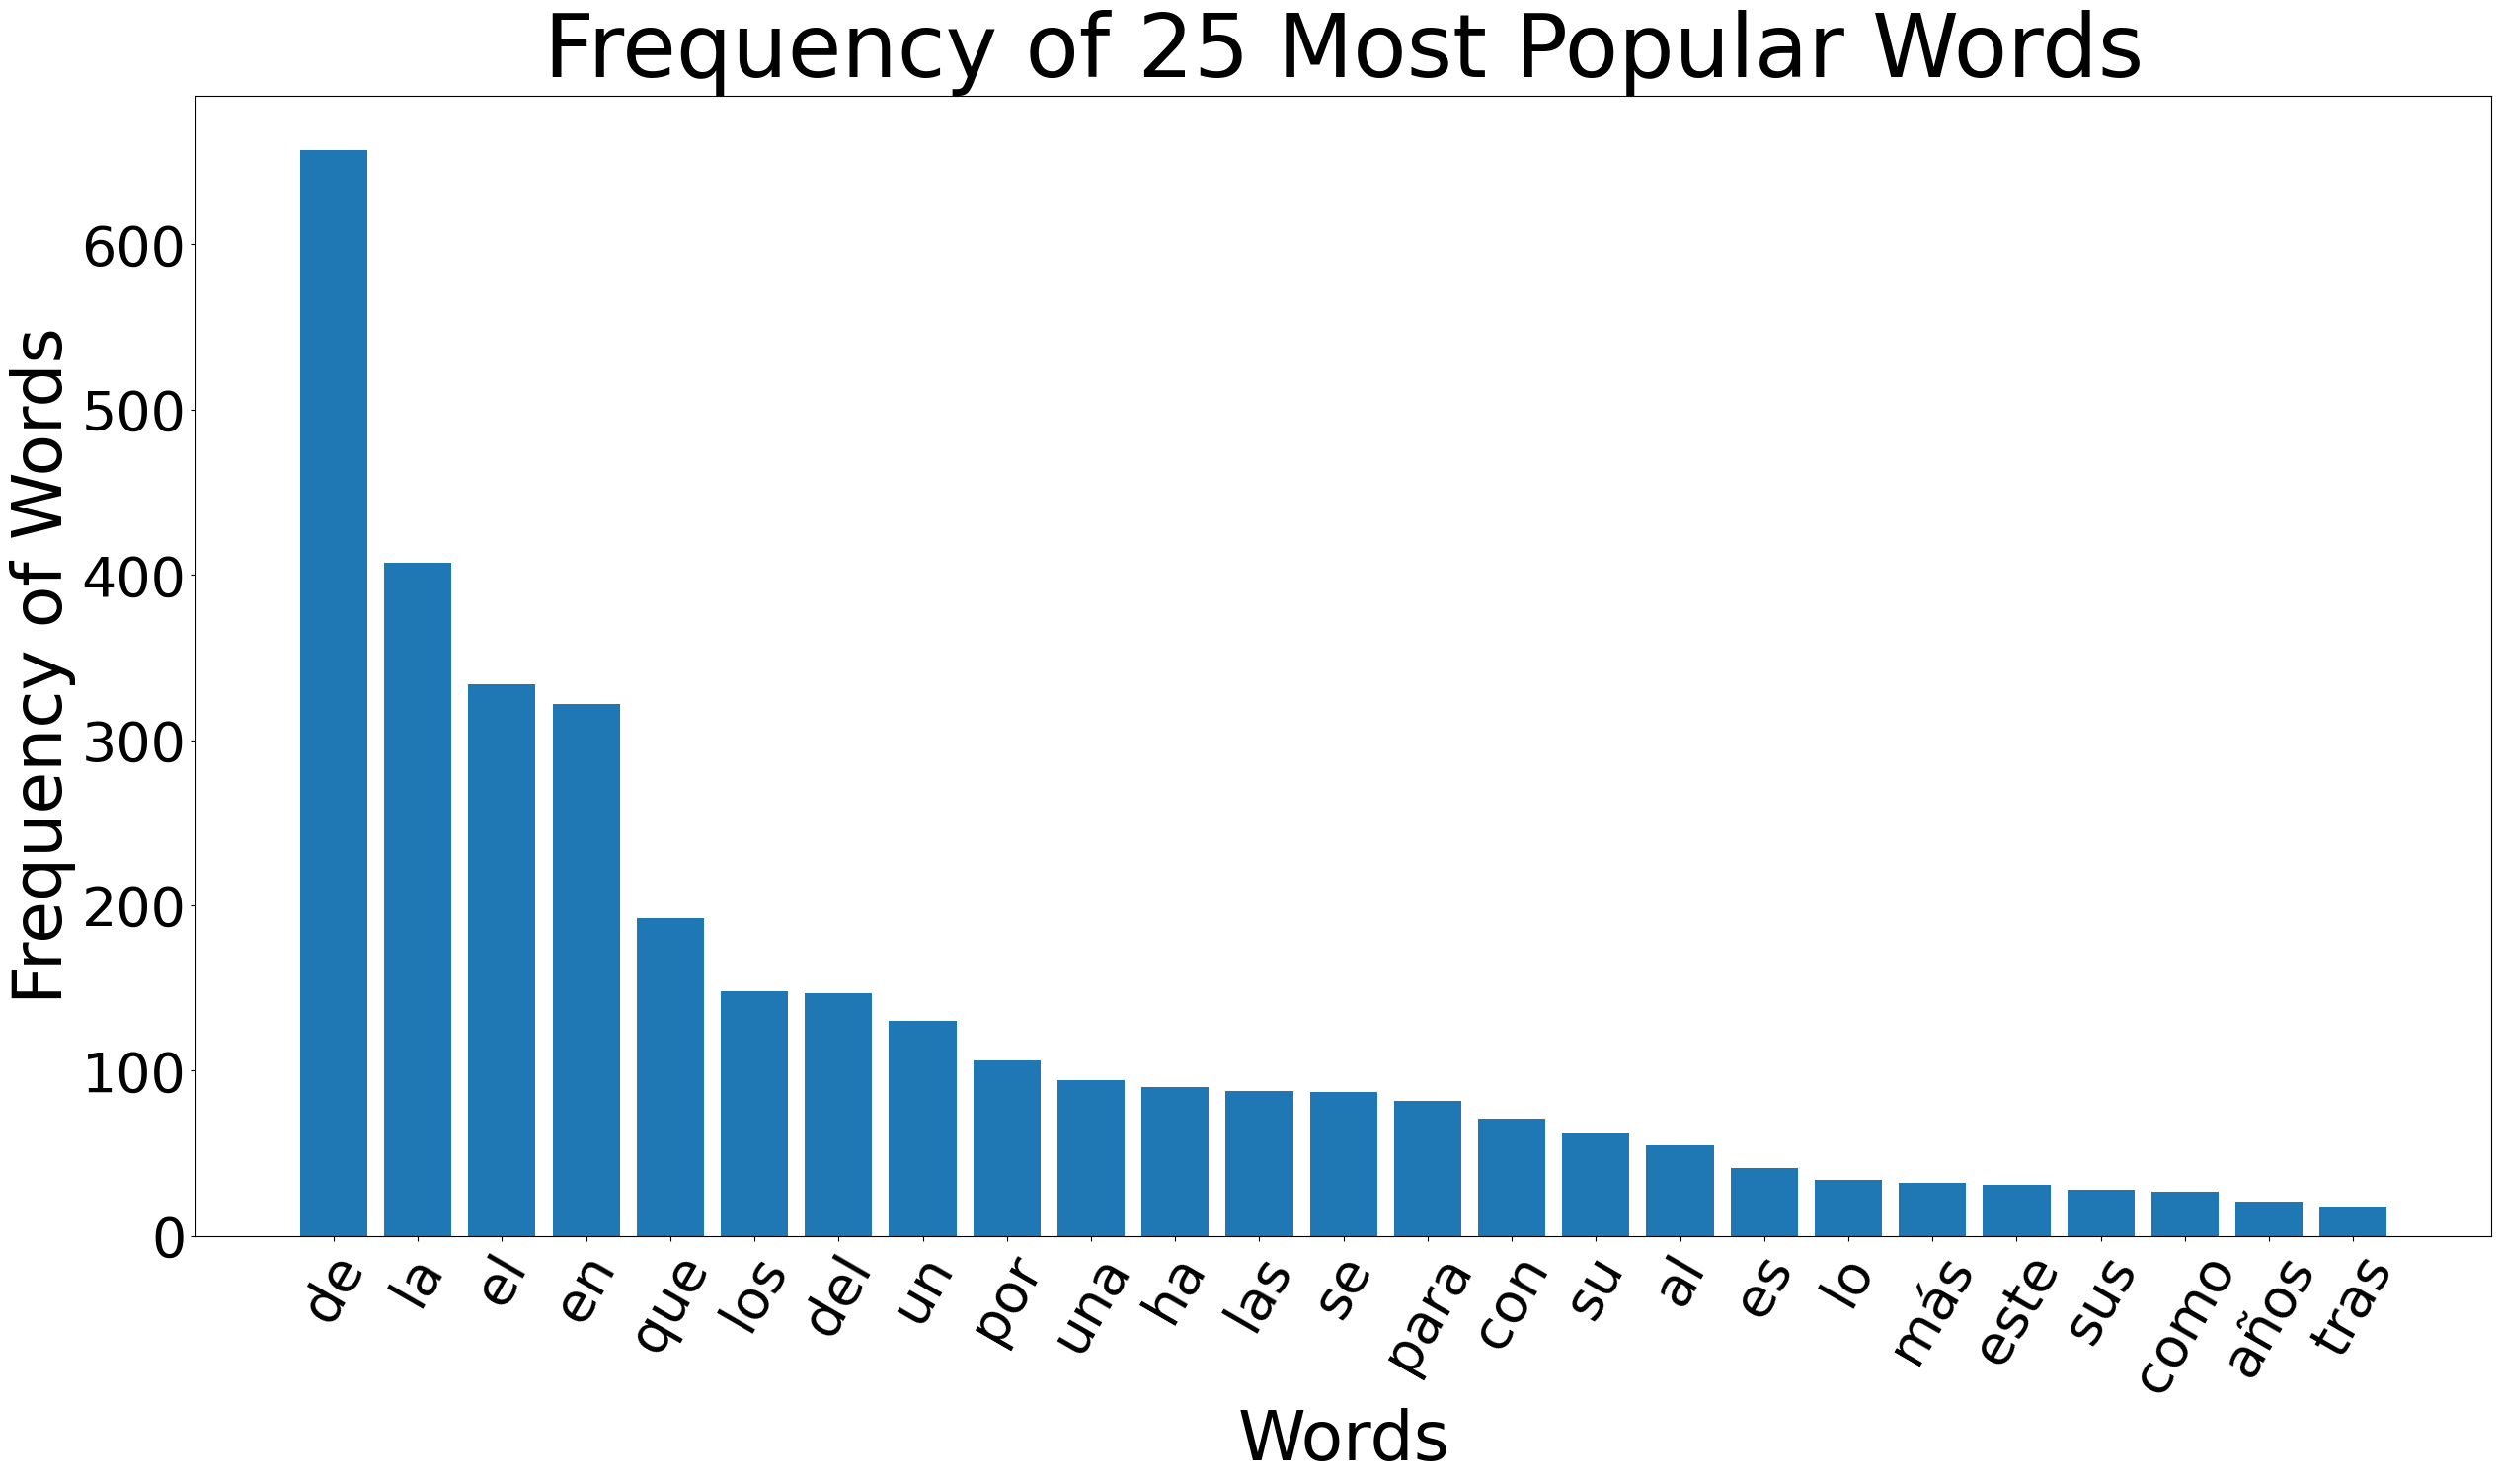

In [20]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=25,
    label_type=None
)

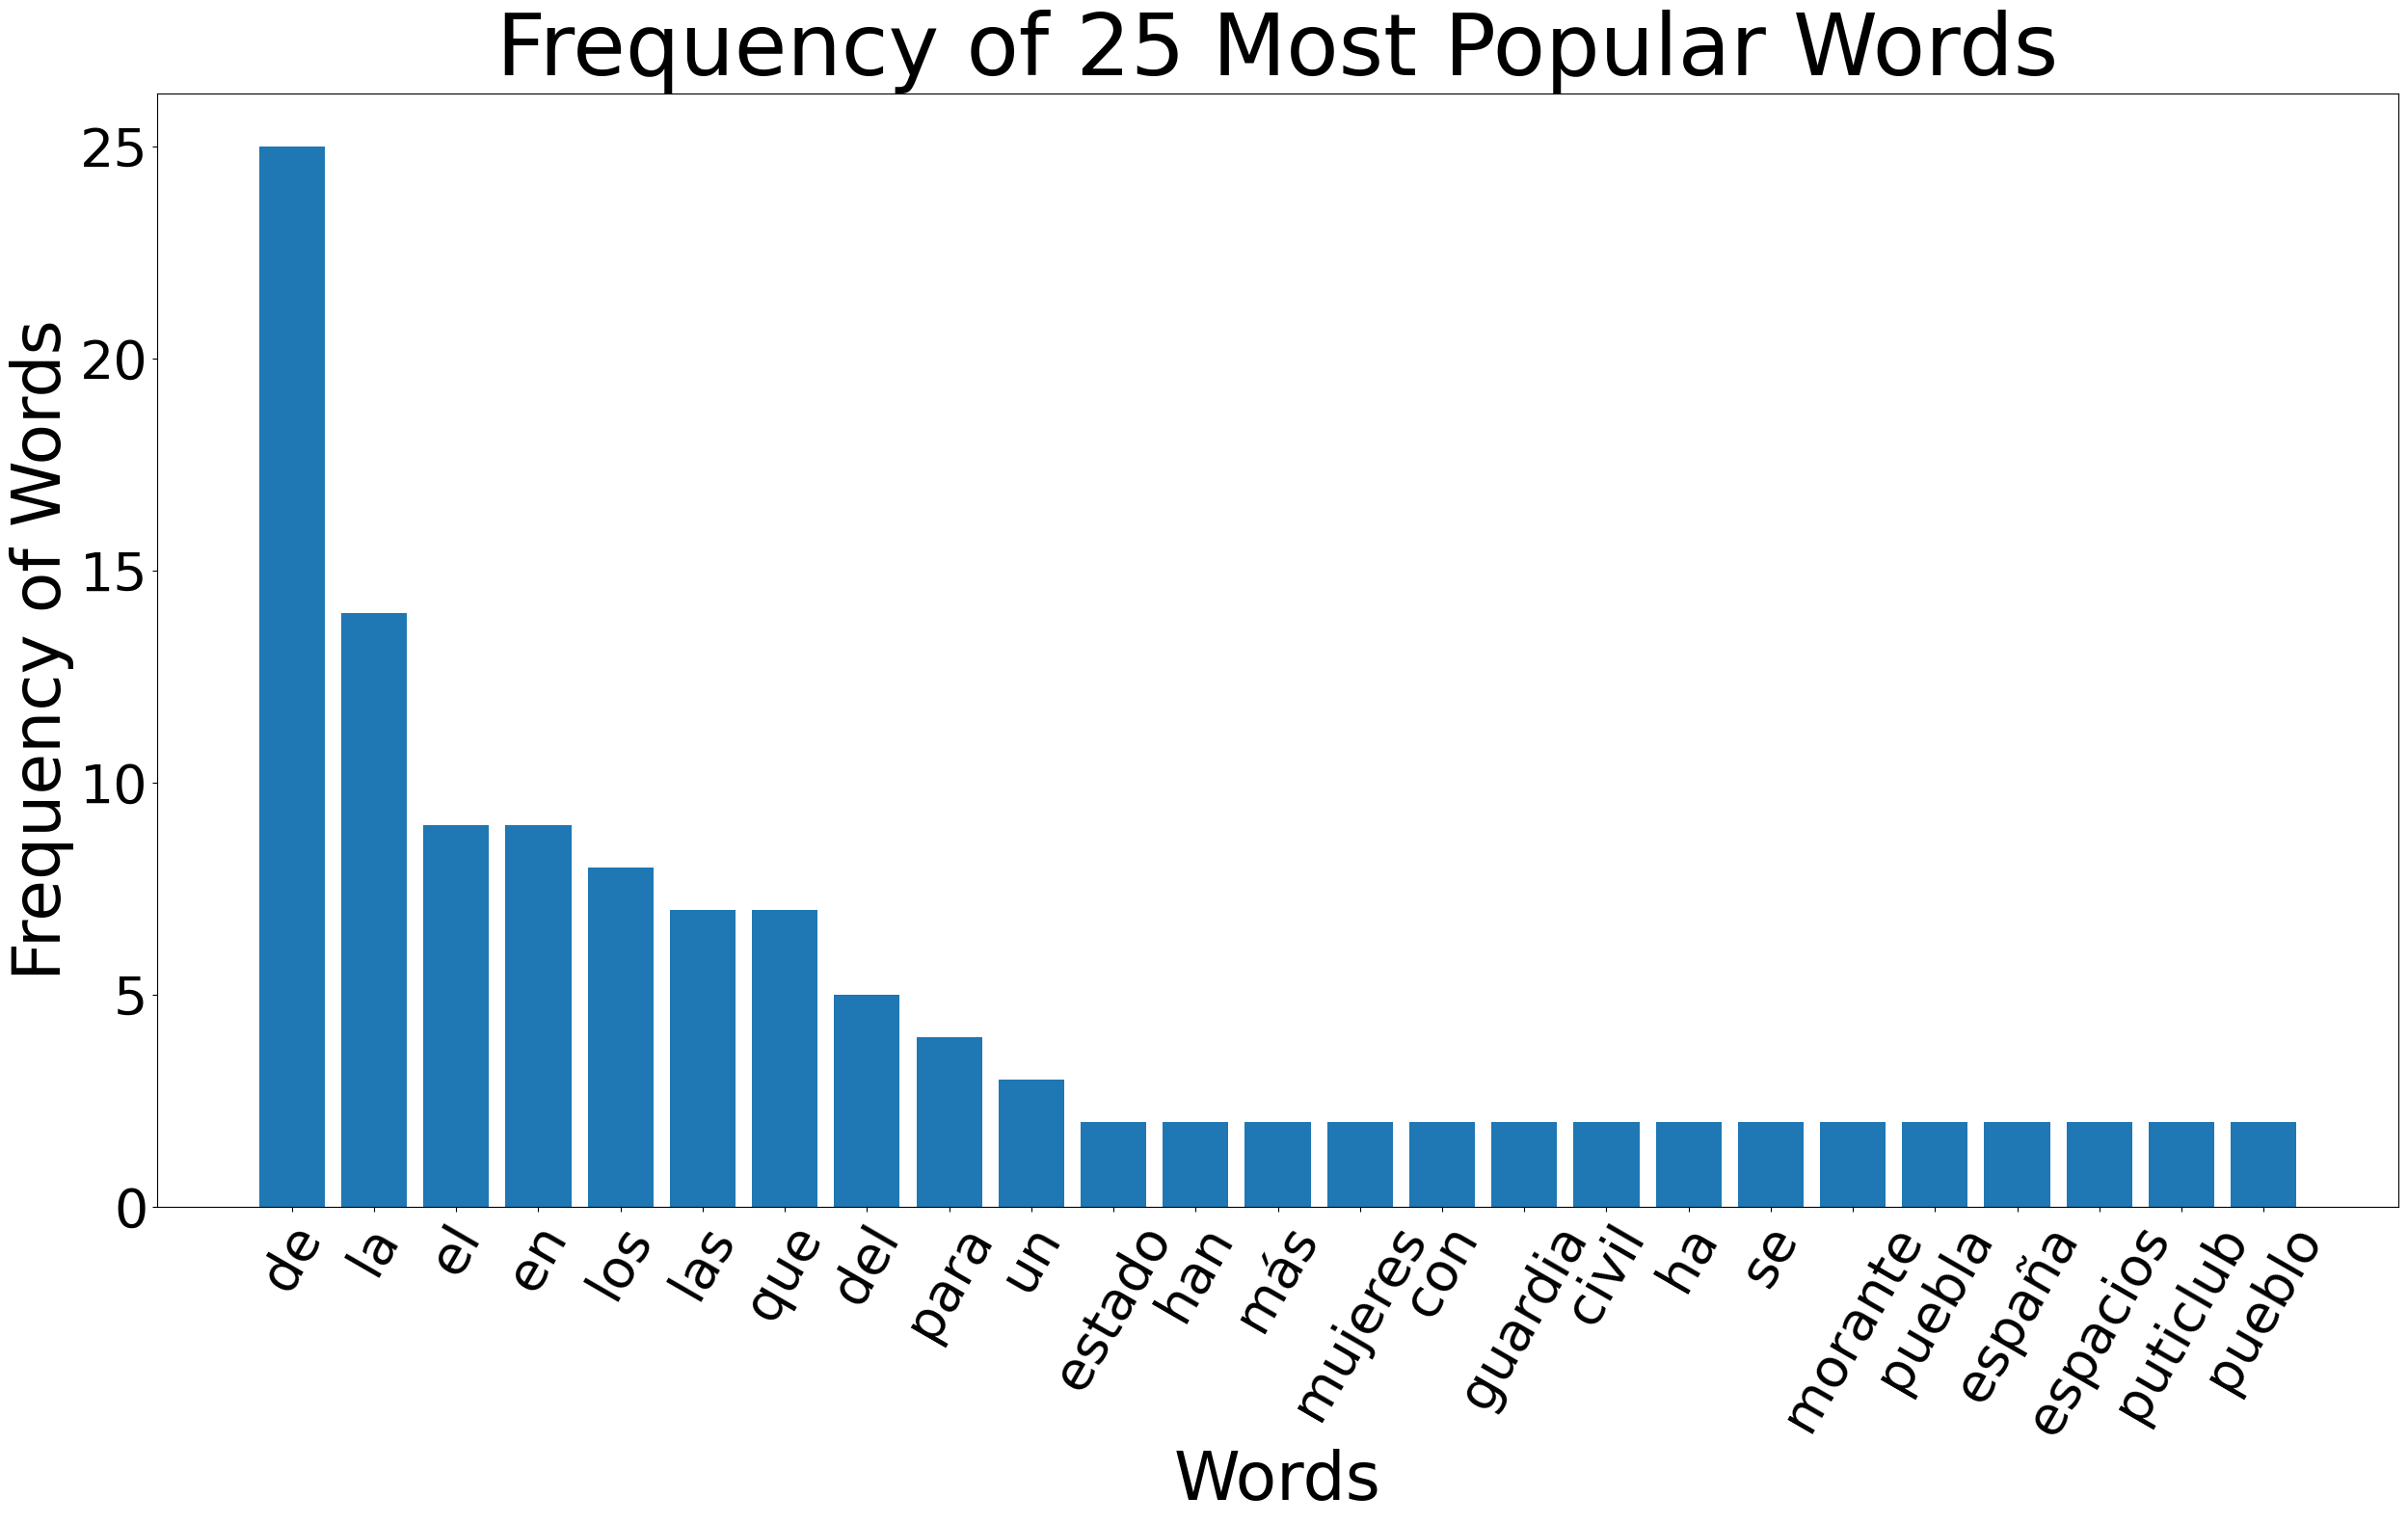

In [21]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=25,
    label_type=None
)